In [1]:
"""Assignment 5

@author: Tim Thompson, timathom@indiana.edu
"""

import numpy as np
import matplotlib.pyplot as plt
from numdifftools import Derivative
from sympy.abc import x
from sympy import solveset, S, N
from scipy.special import factorial
import math
import inspect

1.

Using sympy to solve for the root of the function, we get the same answer as before: {-1.27372233678738}

In [2]:
print(N(solveset(2 * (x ** 3) - 3 * (x ** 2) + 9, domain=S.Reals)))

{-1.27372233678738}


2.

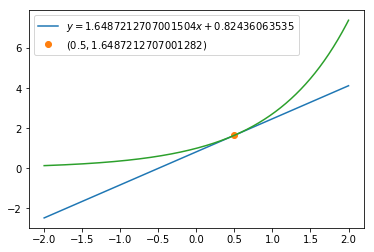

In [3]:
data = np.linspace(-2, 2, 1001)


def e_x(x):
    return np.e**(x)


def point(x, y): plt.plot(x, y, 'o', label="$(" + str(x) + "," + str(y) + ")$")


def points_form(x0, y0, x1, y1, x, start, stop, dim):
    point_slope_form(x0, y0, (y1-y0)/(x1-x0), x, start, stop, dim)


def point_slope_form(x0, y0, m, x, start, stop, dim):
    plt.plot(x,
             np.linspace(m * (start - x0) + y0, m * (stop - x0) + y0, dim),
             label="$y=" + str(m) + "x+" + str(m * (-x0) + y0) + "$")
    point(x0, y0)


def plot_tan(f, x0, x, start, stop, dim):
    dx = Derivative(f)(x0)
    point_slope_form(x0, f(x0), dx, x, start, stop, dim)


plot_tan(e_x, 0.5, data, -2, 2, 1001)
plt.plot(data, e_x(data))
plt.legend()
plt.show()

3. I don't understand exactly what this question is asking for.

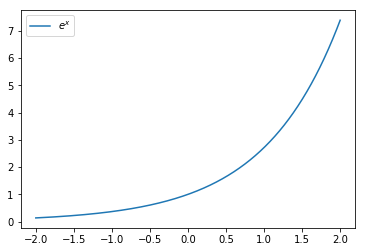

In [4]:
plt.plot(data, e_x(data), label="$e^x$")
plt.legend()
plt.show()

4.

The concept of currying and uncurrying functions was poorly explained in the lecture notes, so it seems neither fair nor appropriate to ask for this in the assignment. This is a course in linear algebra, not functional programming.

That said, I think this is what's being asked for.

In [5]:
def f(x): return 2 * (x ** 3) - 3 * (x ** 2) + 9


def uncurry(f):
    return lambda x, y: f(x)(y)


uncurried = uncurry(Derivative)
print(uncurried(f, 0.5))

-1.4999999999999998


5.

Calling the inner function in this way throws an error (function not defined). The inner function is scoped to the outer function (closure), so it cannot be called from the global scope.

6.

The code prints False. This is reasonable because each call to the function is assigned to a different memory address and so has a different identity. No two calls to the same function are identical.

7.

The derivative of `f(x) = 2` is 0 because the derivative of a constant is always 0.

8.

k = 2, k = 3

Using the binomial theorem to calculate the derivative of a point, we can verify that it is equivalent to k * x_0^k-1

In [6]:
data2 = np.linspace(-2, 2, 101)


def binomial_theorem(x, n, h=0.000001):
    a = np.sum((factorial(n) / (factorial(k) * factorial(n - k))) * x**(n - k) * h**k for k in range(n + 1))
    b = x**n
    return (a - b) / h


for k in [2, 3]:

    print("k = " + str(k))

    print("Binomial theorem: ", binomial_theorem(1.4, k))

    rule = k * (1.4**(k - 1))

    print("Rule: ", rule)

    print("Equivalent = ", (rule - binomial_theorem(1.4, k)) < 0.000001)

k = 2
Binomial theorem:  2.80000100017
Rule:  2.8
Equivalent =  True
k = 3
Binomial theorem:  5.88000419999
Rule:  5.879999999999999
Equivalent =  True


9.

(1 + 0.01)^3 = 1.030302

In [7]:
x0 = ((3 * 2) / (3 * 2))
x1 = ((3 * 2) / 2) * 0.01
x2 = ((3 * 2) / 2) * 0.01**2
x3 = ((3 * 2) / 3) * 0.01**3

total = (x0 + x1 + x2 + x3)
print(total)

1.030302


10.

The lecture notes state, "However, completely understanding the proof of the general formula in the table is not easy, and will be omitted here."

Therefore, I must note that it is unfair that students would be asked to do something that was not covered in the content or scope of the course.

Proof based on https://www.youtube.com/watch?v=ElyrN5M91Ho

In [8]:
# First initialize some variables with example values to make this workable in Python.

x = 1.4
n = 2
y = x**n
dy_dx = 1.

# 1. Express the exponential function as a logarithm: log_x(y) = n
math.log(y, x) == n  # True

# 2. log_x(y) = n can be rewritten as ln(y) / ln(x)
math.log(y, x) == np.log(y) / np.log(x)  # True

# 3. Multiply both sides by ln(x)
np.log(x) * np.log(y) / np.log(x) == n * np.log(x)  # True

np.log(y) == n * np.log(x)  # True

# 4. Use implicit differentiation to solve
# The derivative of ln(y) is 1/y
1/y * dy_dx == n/x  # False because not yet solved for dy_dx

# Multiply both sides by y
y * 1/y * dy_dx == n/x * y  # False because not yet solved for dy_dx

# dy_dx now by itself
dy_dx = n/x * y

# Substitute x**n for y
dy_dx = n/x * x**n

# Rewrite fraction as negative exponent
dy_dx = n * x**-1 * x**n

# Multiply x terms to combine exponents
dy_dx = n * x**(n - 1)

print("Answer: ", dy_dx)

Answer:  2.8


11.

In [9]:
def f1(x):
    def f(x):
        return x**7 + (3 * x**6) - 4**2 + 5
    return Derivative(f)(x)


def f2(x):
    def f(x):
        return (x**2 + (3 * x) - 1) * (x**4 - (8 * x))
    return Derivative(f)(x)


def f3(x):
    def f(x):
        return (x**2 - 1) / (x**2 + 1)
    return Derivative(f)(x)


def f4(x):
    def f(x):
        return (x**3 - (4 * x**2) + 1)**5
    return Derivative(f)(x)


def f5(x):
    def f(x):
        return (3 * x**(2./3)) + (3 * x**-1)
    return Derivative(f)(x)

12.

In [10]:
h = 0.000001


def f1_2(x):
    return x**7 + (3 * x**6) - 4**2 + 5


print((f1_2(1 + h) - f1_2(1)) / h)

25.000065997815568


13.

This question is not clear, but I believe it refers to the difference between computing the derivative directly (e.g., by the binomial theorem) versus computing it using the definition. The Derivative library in Python will always include a tiny fractional component because h can never equal 0. When calculating directly, however, h is factored out as it approaches 0.

14.

The Python `inspect` module support introspection of Python code. For example:

In [12]:
# Returns the text of the function as a string.
print(inspect.getsource(f1_2))

def f1_2(x):
    return x**7 + (3 * x**6) - 4**2 + 5



15.

In [13]:
# Constants for testing
h = 0.000001
x_ = 2
k_ = 2

# f(x)
def f_(x): return x**3


# g(x)
def g_(x): return np.log(x)


# Addition rule
def f6(f, g, x):
    return ((3 * x**2) + 1./x) - (Derivative(f)(x) + Derivative(g)(x)) < h


# Difference rule
def f7(f, g, x):
    return ((3 * x**2) - 1./x) - (Derivative(f)(x) + Derivative(g)(x)) < h


# Product rule
def f8(f, x, k):
    return k * (3 * x**2) - (k * Derivative(f)(x)) < h


# Product rule
def f9(f, g, x):
    return ((3 * x**2) * np.log(x) + x**2) - ((Derivative(f)(x) * g(x)) + (f(x) * Derivative(g)(x))) < h


# Quotient rule
def f10(f, g, x):
    num = (((3 * x**2) * np.log(x)) - (x**3 * 1./x))
    den = np.log(x)**2
    return (num / den) - (((Derivative(f)(x) * g(x)) - (f(x) * Derivative(g)(x))) / g(x)**2) < h


# Power rule
def f11(f, x, k):
    func = lambda x: f(x)**k
    return (k * f(x)**(k - 1) * (3 * x**2)) - (Derivative(func)(x)) < h


# Chain rule
def f12(f, g, x):
    func = lambda x: f(g(x))
    return ((3 * (np.log(x))**2) * 1./x) - (Derivative(f)(g(x)) * Derivative(g)(x)) < h


print("Addition rule: ", f6(f_, g_, x_))

print("Difference rule: ", f7(f_, g_, x_))

print("Product rule: ", f8(f_, x_, k_))

print("Product rule: ", f9(f_, g_, x_))

print("Quotient rule: ", f10(f_, g_, x_))

print("Power rule: ", f11(f_, x_, k_))

print("Chain rule: ", f12(f_, g_, x_))

Addition rule:  True
Difference rule:  True
Product rule:  True
Product rule:  True
Quotient rule:  True
Power rule:  True
Chain rule:  True


/home/tat2/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/tat2/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numdifftools/extrapolation.py:443: RuntimeWarning: invalid value encountered in less_equal
  converged = err <= tol
/home/tat2/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numdifftools/limits.py:150: RuntimeWarning: invalid value encountered in less
  outliers = (((abs(der) < (a_median / trim_fact)) +
/home/tat2/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numdifftools/limits.py:151: RuntimeWarning: invalid value encountered in greater
  (abs(der) > (a_median * trim_fact))) * (a_median > 1e-8) +
/home/tat2/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numdifftools/limits.py:152: RuntimeWarning: invalid value encountered in less
  ((der < p25-1.5*iqr) + (p75+1.5*iqr < der))